In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


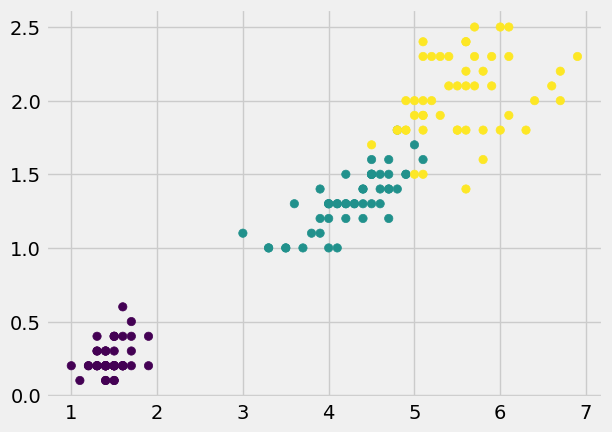

In [4]:
plt.style.use('fivethirtyeight')
plt.scatter(X[:, 2], X[:, 3], c=y)

In [5]:
X = X[:, [2, 3]]

In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

# MinMax in perceptron model give us 76% accuracy
scale = StandardScaler()
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape, y_train.shape

((120, 2), (120,))

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred) *100

93.33333333333333

In [21]:
from sklearn.linear_model import Perceptron

model2 = Perceptron(eta0=0.1, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred) * 100

86.66666666666667

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundry(X, y, model, test_idx=None, resulotion=0.02):
    plt.style.use('ggplot')
    marker = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resulotion),
                           np.arange(x2_min, x2_max, resulotion))
    
    lab = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=colors[idx],
                    marker=marker[idx], label =f'class {c1}', edgecolor='black')
        
    if test_idx:
        x_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')
    plt.tight_layout()
    plt.legend()

In [23]:
from sklearn.svm import SVC

model_SVC = SVC(kernel='linear', C=1.0)
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

# SGDClassifier  in linear_model
## SGDClassifier(loss=' ')



loss{‘hinge’, ‘log_loss’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’hinge’
The loss function to be used.

‘hinge’ gives a linear SVM.

‘log_loss’ gives logistic regression, a probabilistic classifier.

‘modified_huber’ is another smooth loss that brings tolerance to

outliers as well as probability estimates.

‘squared_hinge’ is like hinge but is quadratically penalized.

‘perceptron’ is the linear loss used by the perceptron algorithm.

‘squared_error’, ‘huber’, ‘epsilon_insensitive’ and ‘squared_epsilon_insensitive’ are designed
for regression but can be useful in classification as well

In [24]:
from sklearn.linear_model import LogisticRegression

model_logestic = LogisticRegression(C=100., solver='lbfgs')
model_logestic.fit(X_train, y_train)
y_pred = model_logestic.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [25]:
from sklearn.svm import SVC

model_SVC2 = SVC(kernel='rbf', C=10.0, gamma=1)
model_SVC2.fit(X_train, y_train)
y_pred = model_SVC2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [26]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

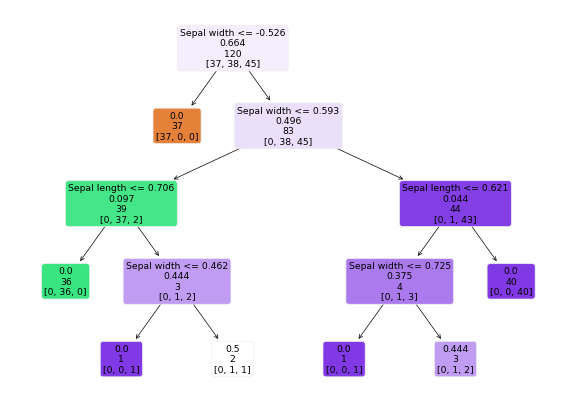

In [27]:
from sklearn import tree

featur_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(model_tree, feature_names=featur_names, filled=True, rounded=True, label=all)
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model_neighbors = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
model_neighbors.fit(X_train, y_train)
y_pred = model_neighbors.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

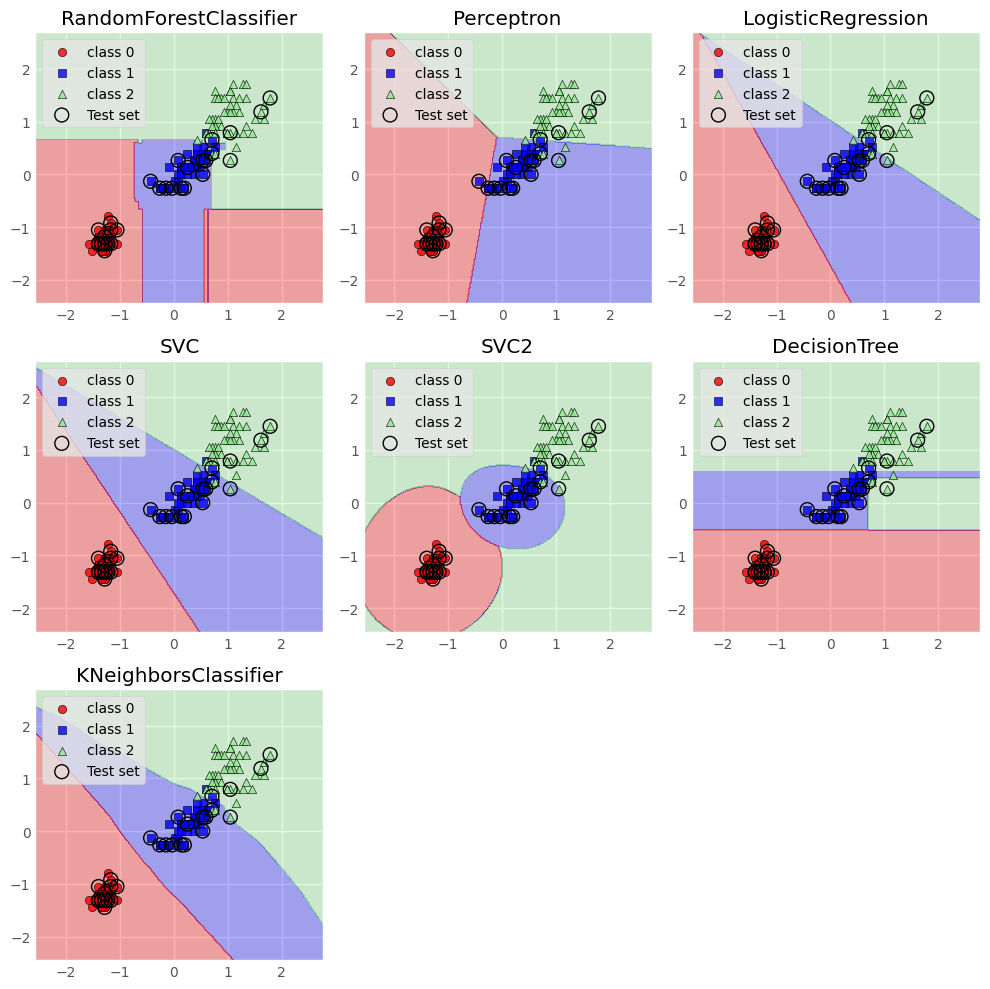

In [32]:
titles = ['RandomForestClassifier', 'Perceptron', 'LogisticRegression', 'SVC', 'SVC2', 'DecisionTree',
         'KNeighborsClassifier']
models = [model1, model2, model_logestic, model_SVC, model_SVC2, model_tree,
         model_neighbors]

fig = plt.figure(figsize=(10,10))
rows, cols = 3, 3

for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plot_decision_boundry(X, y, models[i-1], test_idx=range(120, 150))
    plt.title(titles[i-1])
    
    if i == len(titles):
        break
    
plt.show()